In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files

In [4]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, encoding='latin1', low_memory=False, sep=";")

Saving winequality-red.csv to winequality-red.csv


In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


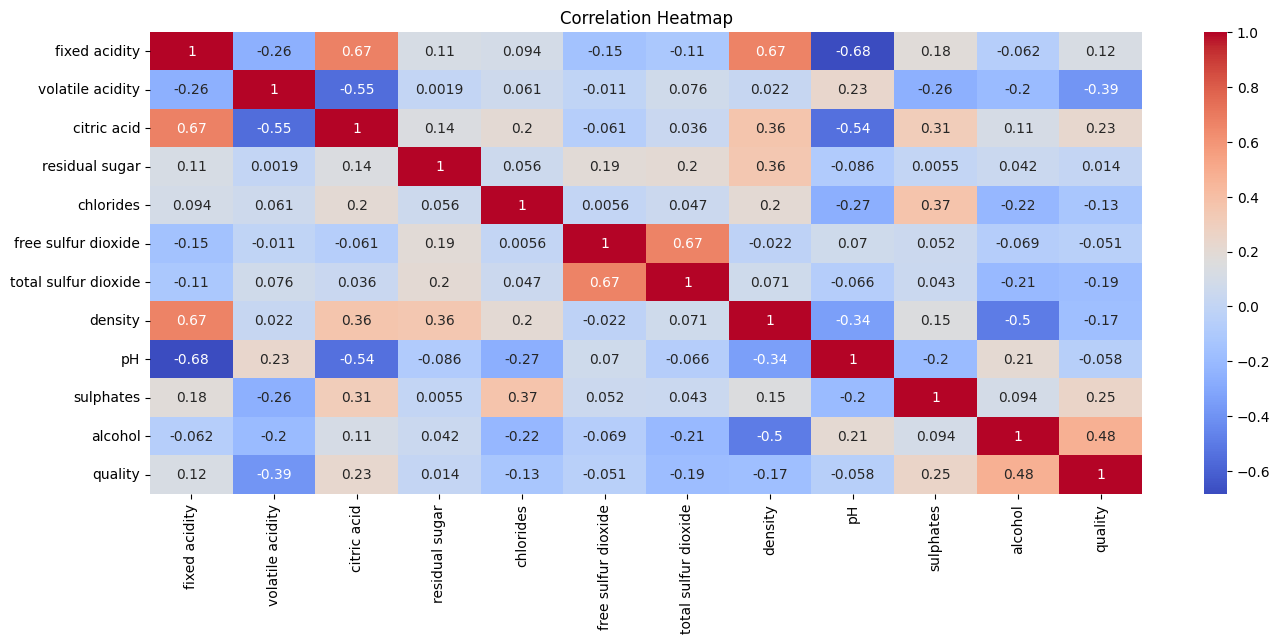

In [16]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap');

In [ ]:
# testar a acidez dos vinhos de acordo com a escala do pH.

In [17]:
df.duplicated().sum()

240

In [18]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [93]:
df = df.drop_duplicates()

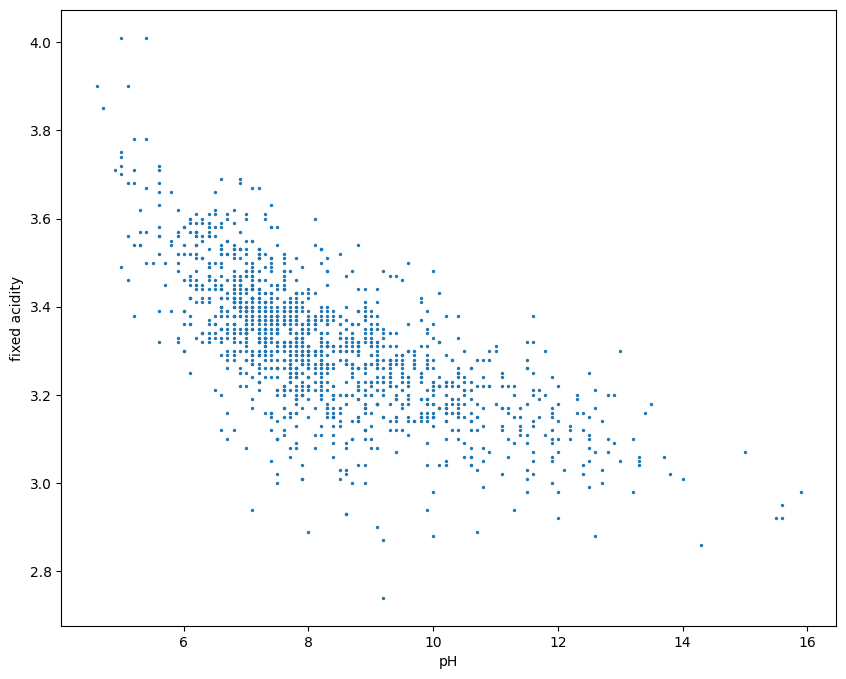

In [99]:
x = df['pH'].values.reshape(-1, 1)
y = df['fixed acidity'].values.reshape(-1, 1)

plt.figure(figsize=(10, 8))
plt.scatter(y, x, s=2)
plt.ylabel('fixed acidity')
plt.xlabel('pH')
plt.show()

In [100]:
from sklearn.linear_model import LinearRegression

b0: [3.81914792] b1: [[-0.06129059]]


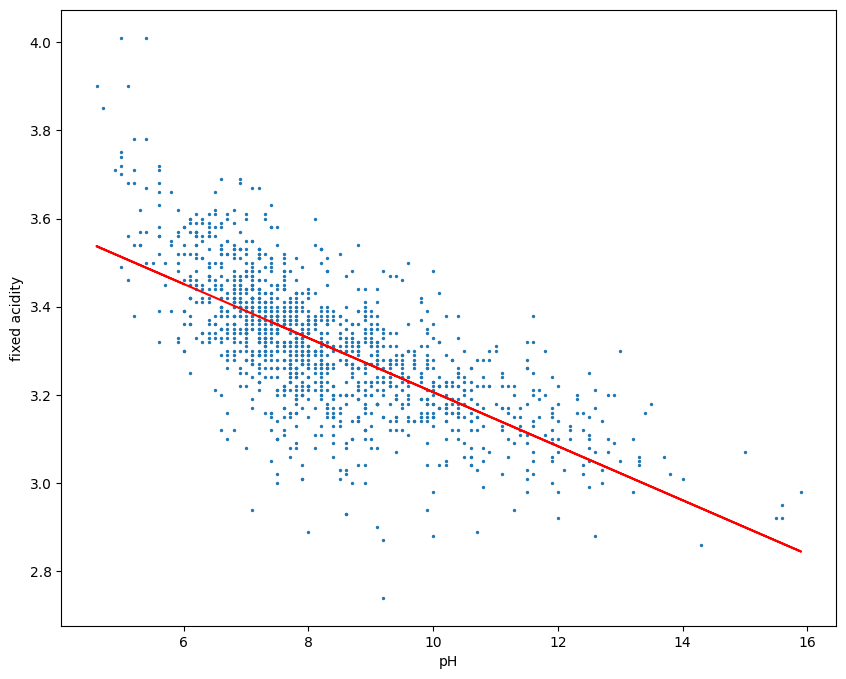

In [102]:
# Utiliza a tecnica dos minimos quadrados.

reg = LinearRegression()
reg.fit(y, x)

print('b0: {} b1: {}'.format(reg.intercept_, reg.coef_))
y_pred = reg.predict(y)

plt.figure(figsize=(10, 8))
plt.scatter(y, x, s=2)
plt.plot(y, y_pred, c='red')
plt.xlabel('pH')
plt.ylabel('fixed acidity')


plt.show()

In [105]:
from sklearn.metrics import r2_score

x = df['pH'].values
y = df['fixed acidity'].values
correlacao = np.corrcoef(x, y)[0, 1]
r_squared = r2_score(y, y_pred, force_finite=False)

print("Correlação entre x e y:", correlacao)
print("Coeficiente de determinação (R^2):", r_squared)

Correlação entre x e y: -0.6866851055982752
Coeficiente de determinação (R^2): -8.421134567076678


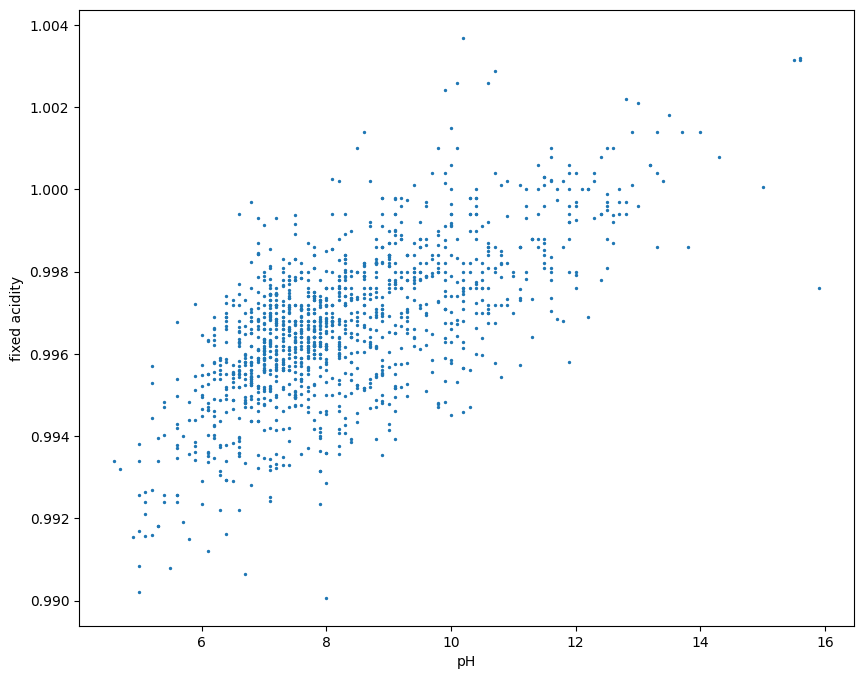

In [106]:
x = df['density'].values.reshape(-1, 1)
y = df['fixed acidity'].values.reshape(-1, 1)

plt.figure(figsize=(10, 8))
plt.scatter(y, x, s=2)
plt.ylabel('fixed acidity')
plt.xlabel('density')
plt.show()

b0: [0.9907162] b1: [[0.0007211]]


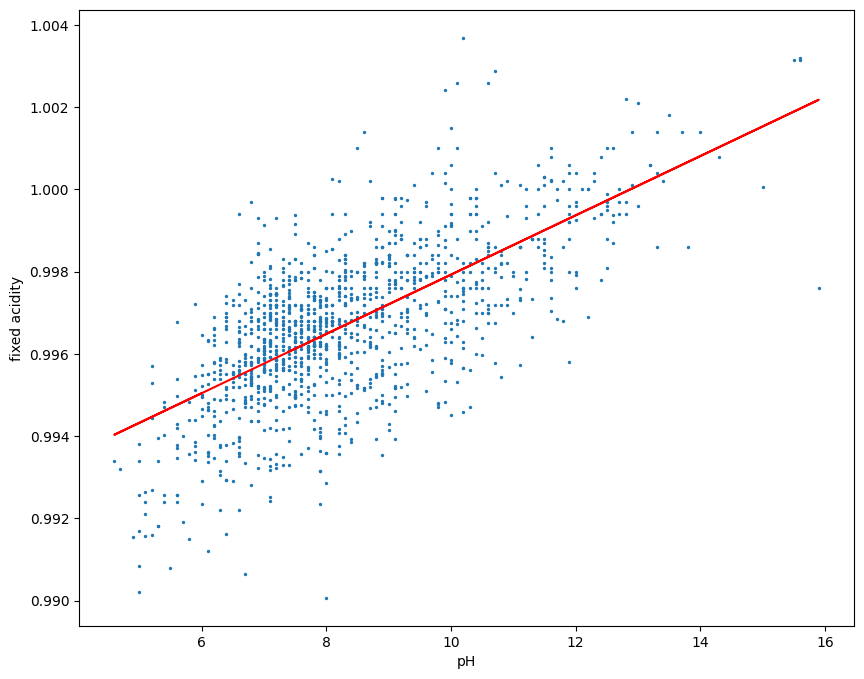

In [107]:
# Utiliza a tecnica dos minimos quadrados.

reg = LinearRegression()
reg.fit(y, x)

print('b0: {} b1: {}'.format(reg.intercept_, reg.coef_))
y_pred = reg.predict(y)

plt.figure(figsize=(10, 8))
plt.scatter(y, x, s=2)
plt.plot(y, y_pred, c='red')
plt.xlabel('density')
plt.ylabel('fixed acidity')


plt.show()

In [108]:
x = df['pH'].values
y = df['fixed acidity'].values
correlacao = np.corrcoef(x, y)[0, 1]
r_squared = r2_score(y, y_pred, force_finite=False)

print("Correlação entre x e y:", correlacao)
print("Coeficiente de determinação (R^2):", r_squared)

Correlação entre x e y: -0.6866851055982752
Coeficiente de determinação (R^2): -17.741337540031623


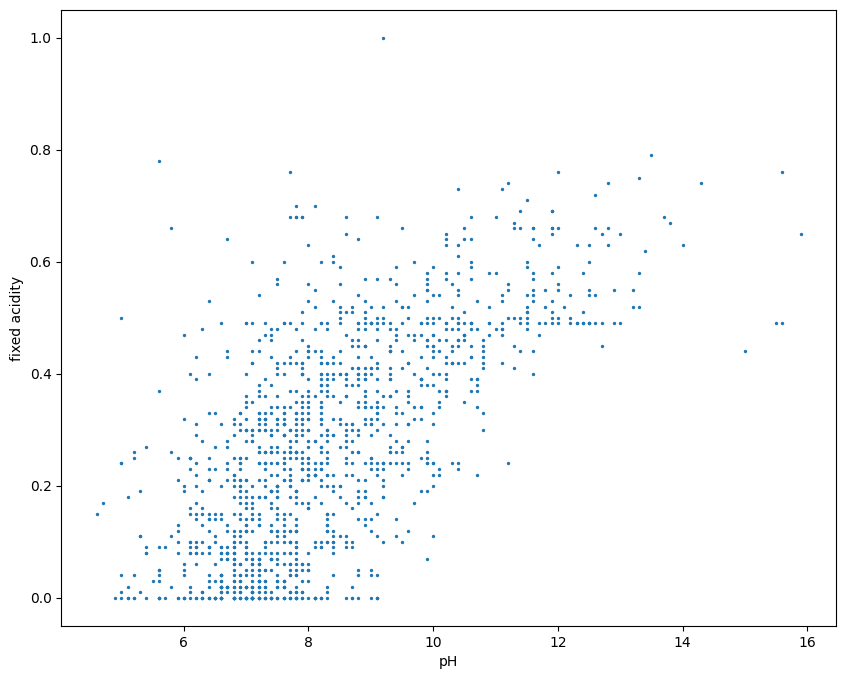

In [109]:
x = df['citric acid'].values.reshape(-1, 1)
y = df['fixed acidity'].values.reshape(-1, 1)

plt.figure(figsize=(10, 8))
plt.scatter(y, x, s=2)
plt.ylabel('fixed acidity')
plt.xlabel('citric acid')
plt.show()

b0: [-0.35208246] b1: [[0.07513481]]


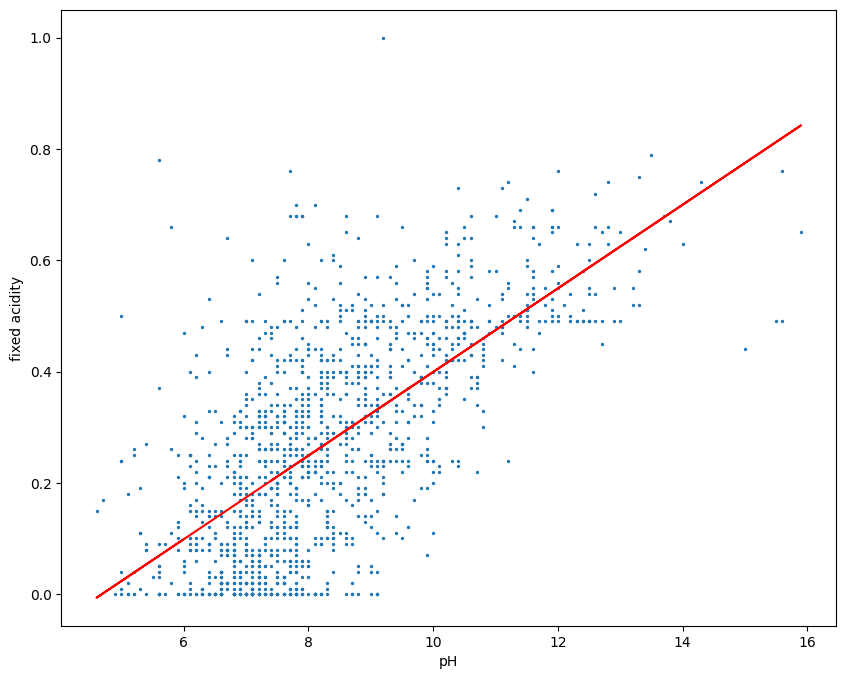

In [110]:
# Utiliza a tecnica dos minimos quadrados.

reg = LinearRegression()
reg.fit(y, x)

print('b0: {} b1: {}'.format(reg.intercept_, reg.coef_))
y_pred = reg.predict(y)

plt.figure(figsize=(10, 8))
plt.scatter(y, x, s=2)
plt.plot(y, y_pred, c='red')
plt.xlabel('citric acid')
plt.ylabel('fixed acidity')


plt.show()

In [111]:
x = df['pH'].values
y = df['fixed acidity'].values
correlacao = np.corrcoef(x, y)[0, 1]
r_squared = r2_score(y, y_pred, force_finite=False)

print("Correlação entre x e y:", correlacao)
print("Coeficiente de determinação (R^2):", r_squared)

Correlação entre x e y: -0.6866851055982752
Coeficiente de determinação (R^2): -21.286729923319065


### **# REGRESSAO POLINOMIAL**

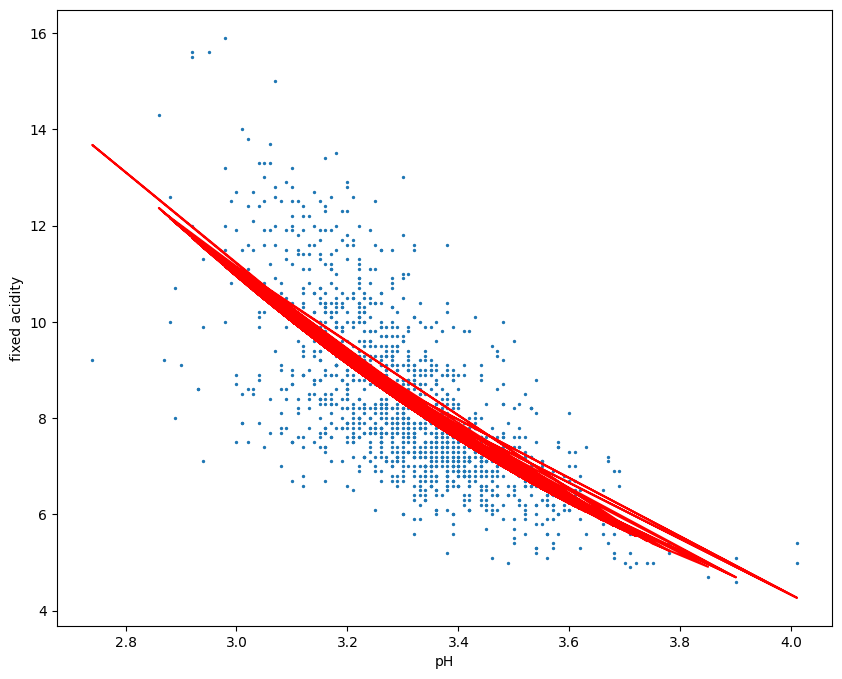

b0: [67.4884424] b1: [[  0.         -28.00054032   3.05117626]]


In [136]:
x = df['pH'].values.reshape(-1, 1)
y = df['fixed acidity'].values.reshape(-1, 1)

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

reg = LinearRegression()
reg.fit(x_poly, y)

y_pred = reg.predict(x_poly)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=2)
plt.plot(x, y_pred, c='red')
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.show()

print('b0: {} b1: {}'.format(reg.intercept_, reg.coef_))

In [137]:
x = df['pH'].values
y = df['fixed acidity'].values
correlacao = np.corrcoef(x, y)[0, 1]
r_squared = r2_score(y, y_pred, force_finite=False)

print("Correlação entre x e y:", correlacao)
print("Coeficiente de determinação (R^2):", r_squared)

Correlação entre x e y: -0.6866851055982752
Coeficiente de determinação (R^2): 0.47655708996045554


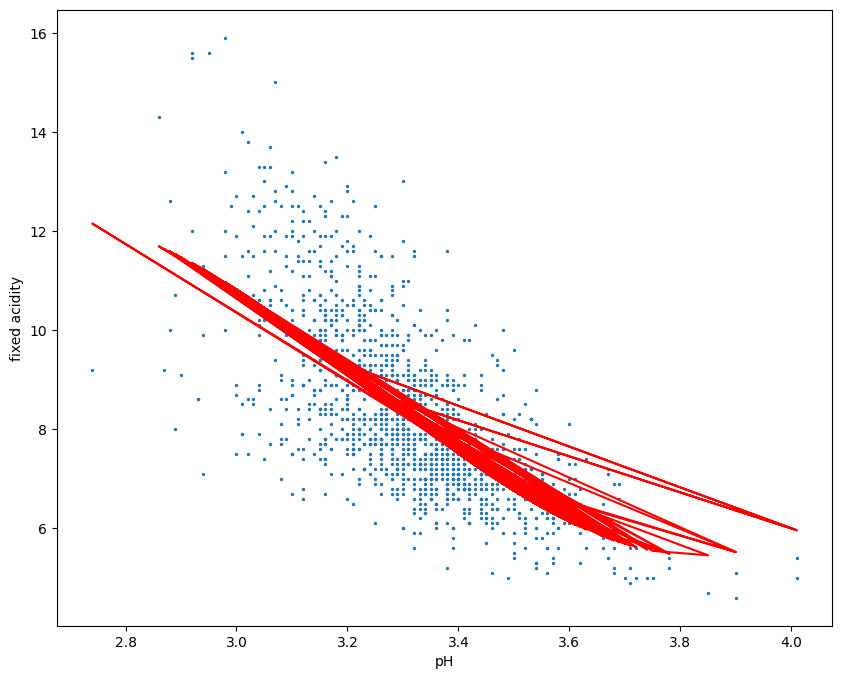

b0: [-243.1223284] b1: [[  0.         250.56545645 -79.99151734   8.22856231]]


In [138]:
x = df['pH'].values.reshape(-1, 1)
y = df['fixed acidity'].values.reshape(-1, 1)

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

reg = LinearRegression()
reg.fit(x_poly, y)

y_pred = reg.predict(x_poly)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=2)
plt.plot(x, y_pred, c='red')
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.show()

print('b0: {} b1: {}'.format(reg.intercept_, reg.coef_))

In [139]:
x = df['pH'].values
y = df['fixed acidity'].values
correlacao = np.corrcoef(x, y)[0, 1]
r_squared = r2_score(y, y_pred, force_finite=False)

print("Correlação entre x e y:", correlacao)
print("Coeficiente de determinação (R^2):", r_squared)

Correlação entre x e y: -0.6866851055982752
Coeficiente de determinação (R^2): 0.4810577296444325


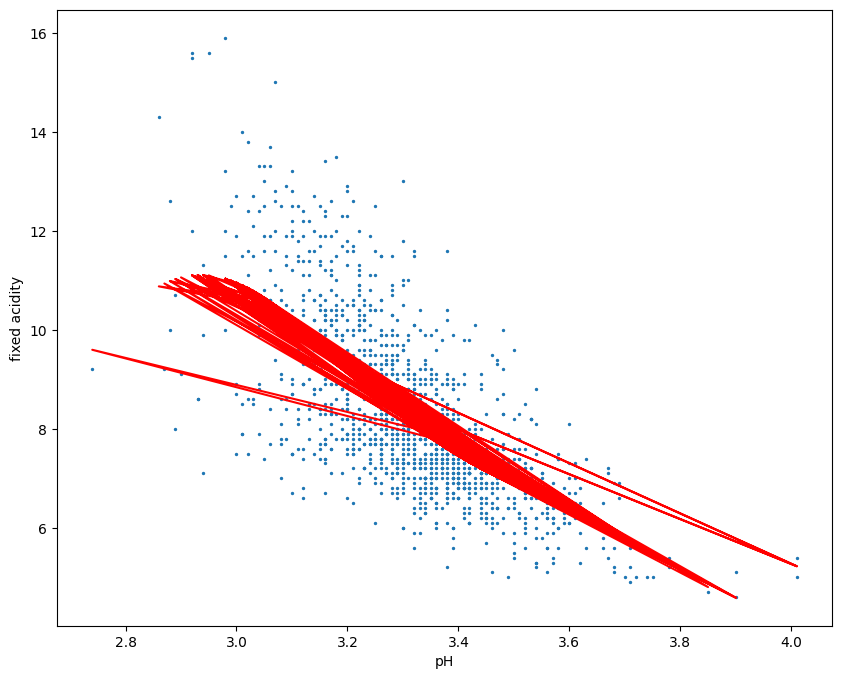

b0: [104490.20004883] b1: [[ 0.00000000e+00 -1.95007426e+05  1.50706513e+05 -6.17469718e+04
   1.41503269e+04 -1.72030010e+03  8.67065869e+01]]


In [153]:
x = df['pH'].values.reshape(-1, 1)
y = df['fixed acidity'].values.reshape(-1, 1)

poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(x)

reg = LinearRegression()
reg.fit(x_poly, y)

y_pred = reg.predict(x_poly)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=2)
plt.plot(x, y_pred, c='red')
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.show()

print('b0: {} b1: {}'.format(reg.intercept_, reg.coef_))

In [154]:
x = df['pH'].values
y = df['fixed acidity'].values
correlacao = np.corrcoef(x, y)[0, 1]
r_squared = r2_score(y, y_pred, force_finite=False)

print("Correlação entre x e y:", correlacao)
print("Coeficiente de determinação (R^2):", r_squared)

Correlação entre x e y: -0.6866851055982752
Coeficiente de determinação (R^2): 0.4880089084472543


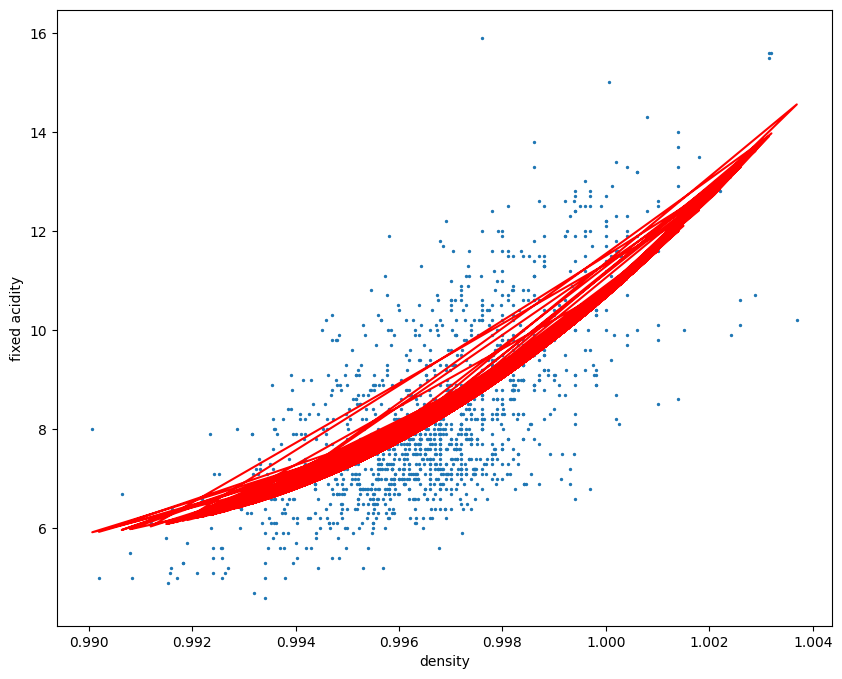

b0: [41549.24333374] b1: [[     0.         -83975.83188467  42437.24894691]]


In [159]:
x = df['density'].values.reshape(-1, 1)
y = df['fixed acidity'].values.reshape(-1, 1)

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

reg = LinearRegression()
reg.fit(x_poly, y)

y_pred = reg.predict(x_poly)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=2)
plt.plot(x, y_pred, c='red')
plt.xlabel('density')
plt.ylabel('fixed acidity')
plt.show()

print('b0: {} b1: {}'.format(reg.intercept_, reg.coef_))

In [158]:
x = df['pH'].values
y = df['fixed acidity'].values
correlacao = np.corrcoef(x, y)[0, 1]
r_squared = r2_score(y, y_pred, force_finite=False)

print("Correlação entre x e y:", correlacao)
print("Coeficiente de determinação (R^2):", r_squared)

Correlação entre x e y: -0.6866851055982752
Coeficiente de determinação (R^2): 0.47003399546394253
